The Binary transmitter sequence : [1 0 1 1 1 0 1 0 1]
Binary Information at Receiver:
[1. 0. 1. 1. 1. 0. 1. 0.]


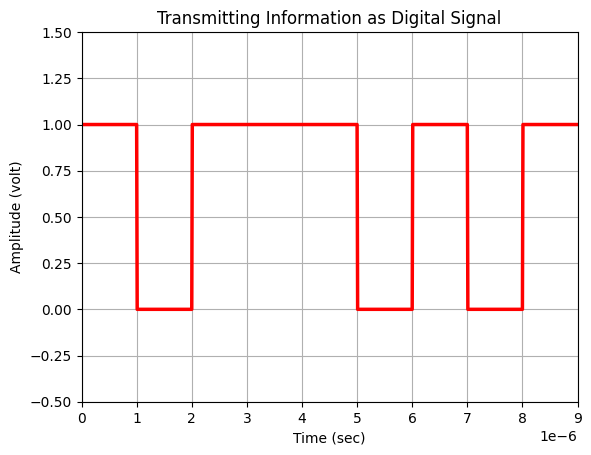

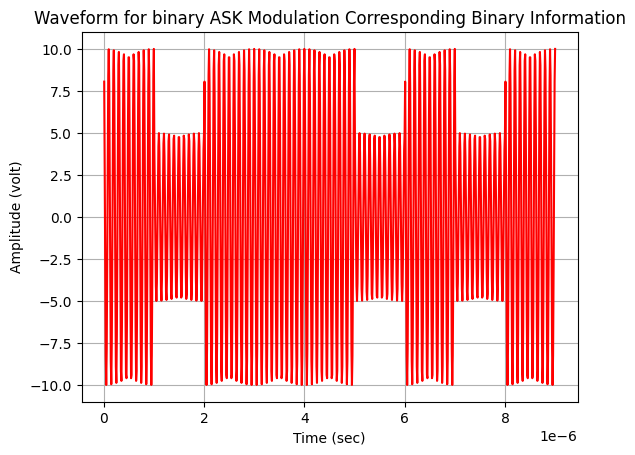

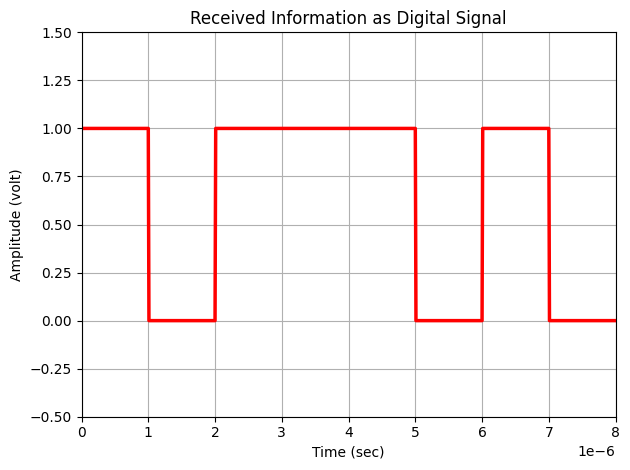

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Binary information at transmitter
bp = 0.000001
N=9
x=np.random.randint(2,size=N)
print("The Binary transmitter sequence :",x)
# Representation of transmitting binary information as digital signal
bit = np.array([])
for n in range(len(x)):
    if x[n] == 1:
        se = np.ones(100)
    else:
        se = np.zeros(100)
    bit = np.concatenate((bit, se))
# Adjust the step size of np.arange to match the length of bit
t1 = np.arange(bp / 100, 100 * len(x) * (bp / 100) + bp / 100, bp / 100)

plt.figure(1)
plt.plot(t1, bit, linewidth=2.5,color='red')
plt.grid(True)
plt.axis([0, bp * len(x), -0.5, 1.5])
plt.ylabel("Amplitude (volt)")
plt.xlabel("Time (sec)")
plt.title("Transmitting Information as Digital Signal")

# Binary ASK Modulation
A1 = 10
A2 = 5
br = 1 / bp
f = br * 10
t2 = np.arange(bp / 99, bp + bp/99, bp / 99)
ss = len(t2)
m = np.array([])
for i in range(len(x)):
    if x[i] == 1:
        y = A1 * np.cos(2 * np.pi * f * t2)
    else:
        y = A2 * np.cos(2 * np.pi * f * t2)
    m = np.concatenate((m, y))

t3 = np.arange(bp / 99, bp * len(x), bp / 99)
plt.figure(2)
plt.plot(t3, m,color='red')
plt.grid(True)
plt.xlabel("Time (sec)")
plt.ylabel("Amplitude (volt)")
plt.title("Waveform for binary ASK Modulation Corresponding Binary Information")

# Binary ASK Demodulation
mn = np.array([])
for n in range(ss, len(m), ss):
    t = np.arange(bp / 99, bp, bp / 99)
    y = np.cos(2 * np.pi * f * t)
    mm = y * m[(n - (ss - 1)):n]
    t4 = np.arange(bp / 99, bp, bp / 99)
    z = np.trapz(mm, t4)
    zz = round((2 * z / bp))
    if zz > 7.5:
        a = 1
    else:
        a = 0
    mn = np.append(mn, a)

print("Binary Information at Receiver:")
print(mn)

# Representation of Binary Data Into Digital Signal
bit = np.array([])
for n in range(len(mn)):
    if mn[n] == 1:
        se = np.ones(100)
    else:
        se = np.zeros(100)
    bit = np.concatenate((bit, se))
t4 = np.arange(bp / 100, 100 * len(mn) * (bp / 100) + bp / 100, bp / 100)

plt.figure(3)
plt.plot(t4, bit, linewidth=2.5,color='red')
plt.grid(True)
plt.axis([0, bp * len(mn), -0.5, 1.5])
plt.ylabel("Amplitude (volt)")
plt.xlabel("Time (sec)")
plt.title("Received Information as Digital Signal")

plt.tight_layout()
plt.show()
